# Soft Business function

In [1]:
import os
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import sys
import pandas as pd
#import tensorflow
#import keras
import wordcloud
import nltk
import inspect
import re
import unicodedata

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import RSLPStemmer #Stemmer for portugese words.

from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
#import missingno as msno
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
import string
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import time
import sys
import math
import itertools
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#import folium
#from folium.plugins import Fullscreen
#import geopandas as gpd
import json
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [3]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function plots a customized confusion matrix
    
    Input:
        cm: confusion matrix generated from sklearn's method confusion_matrix(set, predictions)
        classes: target labels to be plotted
        title: title
        cmap: matrix color
    Output:
        None
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Plot configuration
    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
#os.chdir("/Users/danielacadavid/Documents/Universidad/Maestria/201920/00_Bases/brazilian-ecommerce/")
os.chdir("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\")
os.getcwd()

'C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce'

In [5]:
order_items=pd.read_csv('olist_order_items_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')
ordenes = pd.read_csv('olist_orders_dataset.csv')
orders=pd.read_csv('data_tratada_v_nao.csv')
print(orders.shape)
print(customers.shape)
print(ordenes.shape)
print(order_items.shape)
print(list(orders.columns))
print(list(customers.columns))
print(list(ordenes.columns))
print(list(order_items.columns))

(41753, 8)
(99441, 5)
(99441, 8)
(112650, 7)
['Unnamed: 0', 'review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [6]:
cols_orders = ['review_id','review_score','order_id','review_comment_message']
orders = orders[cols_orders]
list(orders.columns)

['review_id', 'review_score', 'order_id', 'review_comment_message']

In [7]:
cols_ordenes_it = ['order_id','price','freight_value']
order_items = order_items[cols_ordenes_it]
list(order_items.columns)

['order_id', 'price', 'freight_value']

In [8]:
cols_ordenes = ['order_id','customer_id']
ordenes = ordenes[cols_ordenes]
list(ordenes.columns)

['order_id', 'customer_id']

In [9]:
cols_cust = ['customer_id','customer_unique_id']
customers = customers[cols_cust]
list(customers.columns)

['customer_id', 'customer_unique_id']

In [10]:
# Joining order and items datasets
orders_items_1 = orders.merge(order_items, on='order_id', how='left')
orders_items   = orders_items_1.drop_duplicates(keep='last',subset=['order_id','review_id'])
#valor_orden = orders_items['order_id','review_comment_message','price','freight_value']
print(orders_items.shape)

(41753, 6)


In [11]:
# Joining order and items datasets
orders_items_cust_1 = orders_items.merge(ordenes, on='order_id', how='left')
orders_items_cust   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id'])
#valor_orden = orders_items['order_id','review_comment_message','price','freight_value']
print(orders_items_cust.shape)

(41753, 7)


In [12]:
# Joining order and items datasets
orders_items_cust_1     = orders_items_cust.merge(customers, on='customer_id', how='left')
orders_items_customer   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id','customer_unique_id'])
print(orders_items_customer.shape)

(41753, 8)


In [13]:
vezes=orders_items_customer['customer_unique_id'].value_counts().rename_axis('customer_unique_id').reset_index(name='counts')
#vezes

In [14]:
# Times a client buys
orders_items_cust_1     = orders_items_customer.merge(vezes, on='customer_unique_id', how='left')
orders_items_customer   = orders_items_cust_1.drop_duplicates(keep='last',subset=['order_id','review_id','customer_unique_id'])
print(orders_items_customer.shape)

(41753, 9)


In [15]:
####### ACA SE CREA EL BOW
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(orders_items_customer.review_comment_message).toarray()
X = pd.DataFrame(X_tfidf, columns = list(vectorizer.get_feature_names()))

In [16]:
# Creating the class label
bin_edges = [0, 2, 5]
bin_names = ['0', '1']
orders_items_customer['class'] = pd.cut(orders_items_customer['review_score'] , bins=bin_edges, labels=bin_names)
#orders = orders.iloc[:, np.r_[0, 1, 3, 4, 2, 5,6]
y = orders_items_customer['class'].values
Y_tf = y.astype(int)
#Y_tf

In [17]:
## Variables
list_vars=pd.read_csv('feature_imp_100vars.csv')
vars_gb = list_vars[list_vars.columns[0]][:139]
vars_rf = list_vars[list_vars.columns[0]][:11]
vars_lr = list_vars[list_vars.columns[0]][:652]

In [18]:
#df1 = df[[vars_usar]]
X_GB = pd.DataFrame(X , columns = list(vars_gb))
X_RF = pd.DataFrame(X , columns = list(vars_rf))
X_LR = pd.DataFrame(X , columns = list(vars_lr))

## Boosting

In [19]:
# load the model from disk
filename='finalized_model_rfim_gb.sav'
gb_model = pickle.load(open(filename, 'rb'))
gb_roc_auc=roc_auc_score(Y_tf, gb_model.predict(X_GB))
gb_roc_auc

0.8519927955094256

## Random Forest

In [20]:
# load the model from disk
filename='finalized_model_rfim_rf.sav'
rf_model = pickle.load(open(filename, 'rb'))
rf_roc_auc=roc_auc_score(Y_tf, rf_model.predict(X_RF))
rf_roc_auc

0.7765508928181453

## Logistic Regression

In [21]:
# load the model from disk
filename='finalized_model_rfim_lr.sav'
lr_model = pickle.load(open(filename, 'rb'))
rf_roc_auc=roc_auc_score(Y_tf, lr_model.predict(X_LR))
rf_roc_auc

0.8461167673900679

# Constantes de la funcion

## Make predictions

In [22]:
gb_pred = pd.DataFrame(gb_model.predict(X_GB), columns = ['pred_gb'])
rf_pred = pd.DataFrame(rf_model.predict(X_RF), columns = ['pred_rf'])
lr_pred = pd.DataFrame(lr_model.predict(X_LR), columns = ['pred_lr'])

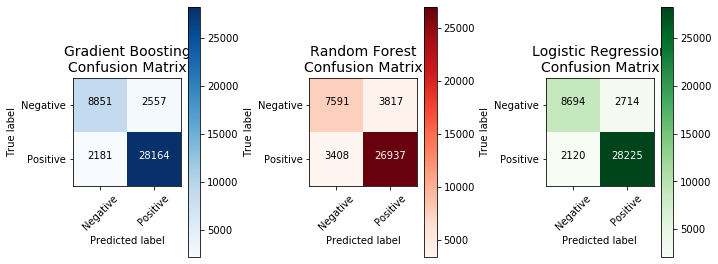

In [23]:
# Confusion matrix
gb_cm = confusion_matrix(Y_tf, gb_pred)
rf_cm = confusion_matrix(Y_tf, rf_pred)
lr_cm = confusion_matrix(Y_tf, lr_pred)

# Plotting
fig = plt.figure(figsize=(10, 4))
classes = ['Negative','Positive']
plt.subplot(131)
plot_confusion_matrix(gb_cm, classes, title='Gradient Boosting\nConfusion Matrix')
plt.subplot(132)
plot_confusion_matrix(rf_cm, classes, cmap=plt.cm.Reds, title='Random Forest\nConfusion Matrix')
plt.subplot(133)
plot_confusion_matrix(lr_cm, classes, cmap=plt.cm.Greens, title='Logistic Regression\nConfusion Matrix')

plt.tight_layout()
plt.show()

## Price e mu

In [24]:
orders_items_customer['valor']=orders_items_customer['price']+orders_items_customer['freight_value']
orders_items_customer['p_n']=orders_items_customer['valor']/max(orders_items_customer['valor'])

orders_items_customer['mu_hi']  = orders_items_customer['p_n'].apply(lambda x: 0.5+0.5*x  if x<=0.5  else 0.75+0.25*x)
orders_items_customer['mu_low'] = orders_items_customer['p_n'].apply(lambda x: 0.4+0.5*x  if x<=0.5  else 0.65+0.25*x)


orders_items_customer['mu_high_counts'] = orders_items_customer['mu_hi']  * orders_items_customer['counts']
orders_items_customer['mu_low_counts']  = orders_items_customer['mu_low'] * orders_items_customer['counts']

In [25]:
orders_items_customer.head()

,review_id,review_score,order_id,review_comment_message,price,freight_value,customer_id,customer_unique_id,counts,class,valor,p_n,mu_hi,mu_low,mu_high_counts,mu_low_counts
0,e64fb393e7b32834bb789ff8bb30750e,5,658677c97b385a9be170737859d3511b,"['receber', 'bem', 'antar', 'prazo', 'estipular']",179.99,42.85,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,1,1,222.84,0.032159,0.516080,0.416080,0.516080,0.416080
1,f7c4243c7fe1938f181bec41a392bdeb,5,8e6bfb81e283fa7e4f11123a3fb894f1,"['parabem', 'loja', 'lannister', 'adorar', 'co...",1199.00,134.25,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a,1,1,1333.25,0.192407,0.596204,0.496204,0.596204,0.496204
2,8670d52e15e00043ae7de4c01cc2fe06,4,b9bf720beb4ab3728760088589c62129,"['aparelhar', 'eficiente', 'site', 'marcar', '...",586.56,26.69,a5224bdc7685fd39cd7a23404415493d,2bf6fd4ad93eb21b3d604481c48decbf,1,1,613.25,0.088501,0.544250,0.444250,0.544250,0.444250
3,4b49719c8a200003f700d3d986ea1a19,4,9d6f15f95d01e79bd1349cc208361f09,"['pouco', 'travar', 'valor', 'ta', 'bom']",35.00,7.78,8ebbeb09e94d1e789142983f73faa9cd,a5ee02c2d02b8929c0949fc114c5a19e,1,1,42.78,0.006174,0.503087,0.403087,0.503087,0.403087
4,3948b09f7c818e2d86c9a546758b2335,5,e51478e7e277a83743b6f9991dbfa3fb,"['vendedor', 'confiar', 'produto', 'ok', 'entr...",89.99,13.07,659ded3e9b43aaf51cf9586d03033b46,57b1099bb38ee91578d2f1c3ee154082,1,1,103.06,0.014873,0.507437,0.407437,0.507437,0.407437


In [26]:
cost = orders_items_customer[['mu_high_counts','mu_low_counts']]


In [27]:
yt=pd.DataFrame(Y_tf.transpose(), columns=['Y_real'])

frames = [yt,gb_pred,rf_pred,lr_pred,cost]
#result = pd.concat(frames)
costo_rfim=pd.concat(frames,axis=1)

In [28]:
costo_rfim

,Y_real,pred_gb,pred_rf,pred_lr,mu_high_counts,mu_low_counts
0,1,1,1,1,0.516080,0.416080
1,1,1,1,1,0.596204,0.496204
2,1,1,1,1,0.544250,0.444250
3,1,1,1,1,0.503087,0.403087
4,1,1,1,1,0.507437,0.407437
...,...,...,...,...,...,...
41748,1,1,1,1,0.512174,0.412174
41749,1,0,0,0,0.503087,0.403087
41750,1,1,1,1,0.516709,0.416709
41751,0,0,0,0,0.501283,0.401283


In [29]:
costo_rfim.to_csv("C:\\Users\\d.cadavid141\\Documents\\Coisas Daniela\\201920\\201920\\00_Bases\\brazilian-ecommerce\\costo_rfim.csv")


## Costo autom.

In [30]:
def costo_d(x):
    if x['Y_real']==x['pred_gb'] and x['pred_gb']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_gb'] and x['pred_gb']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_gb']==0:
        return 0.01

In [31]:
d = costo_rfim.apply(costo_d, axis=1)
a = costo_rfim.apply(costo_a, axis=1)
b = costo_rfim.apply(costo_b, axis=1)

In [32]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_GB=A+B-D
print(f'Soft Function RFIM_GB='+str(round(Costo_GB,2)))

Soft Function RFIM_GB=-2293.26


## Validación LR

In [33]:
def costo_d(x):
    if x['Y_real']==x['pred_lr'] and x['pred_lr']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_lr'] and x['pred_lr']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_lr']==0:
        return 0.01

In [34]:
d = costo_rfim.apply(costo_d, axis=1)
a = costo_rfim.apply(costo_a, axis=1)
b = costo_rfim.apply(costo_b, axis=1)

In [35]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_LR=A+B-D
print(f'Soft Function RFIM_LR='+str(round(Costo_LR,2)))

Soft Function RFIM_LR=-2142.63


## Validación RF

In [36]:
def costo_d(x):
    if x['Y_real']==x['pred_rf'] and x['pred_rf']==0:
        return x['mu_low_counts']
    
def costo_a(x):
    if x['Y_real']!=x['pred_rf'] and x['pred_rf']==1:
        return x['mu_high_counts']
    
def costo_b(x):
    if x['Y_real']==1 and x['pred_rf']==0:
        return 0.01

In [37]:
d = costo_rfim.apply(costo_d, axis=1)
a = costo_rfim.apply(costo_a, axis=1)
b = costo_rfim.apply(costo_b, axis=1)

In [38]:
D=d.sum()
A=a.sum()
B=b.sum()

Costo_RF=A+B-D
print(f'Soft Function RFIM_RF='+str(round(Costo_RF,2)))

Soft Function RFIM_RF=-1094.54


## Sin modelo

In [39]:
def costo_sm(x):
    if x['Y_real']==0:
        return x['mu_high_counts']

In [42]:
sm = costo_rfim.apply(costo_sm, axis=1)

In [43]:
SM = sm.sum()
print(f'Soft Function Without model='+str(round(SM,2)))

Soft Function Without model=5945.27
